<a href="https://colab.research.google.com/github/SeptAlfauzan/30-Days-Cooking/blob/main/face_recognition_liveness_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle
!pip install opendatasets
!pip install pandas

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1egrMopJCVzI6Nc2s-ng62OB7O9EjSzUd' -O kaggle.json

--2023-12-22 00:52:27--  https://docs.google.com/uc?export=download&id=1egrMopJCVzI6Nc2s-ng62OB7O9EjSzUd
Resolving docs.google.com (docs.google.com)... 74.125.24.113, 74.125.24.101, 74.125.24.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.24.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-98-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ugko5j9jbbm24bkgsc695driijr6p3h1/1703206275000/09258705577954588147/*/1egrMopJCVzI6Nc2s-ng62OB7O9EjSzUd?e=download&uuid=5bd5dd92-63ce-4c74-a8ba-59b4035ff971 [following]
--2023-12-22 00:52:29--  https://doc-04-98-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ugko5j9jbbm24bkgsc695driijr6p3h1/1703206275000/09258705577954588147/*/1egrMopJCVzI6Nc2s-ng62OB7O9EjSzUd?e=download&uuid=5bd5dd92-63ce-4c74-a8ba-59b4035ff971
Resolving doc-04-98-docs.googleusercontent.com (doc-04-98-docs.googleusercontent.com)... 74.125.24.132, 2404:6800:4003:

In [ ]:
!chmod 600 ./kaggle.json

Download dataset

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/tapakah68/anti-spoofing/", force=True)

100%|██████████| 1.34G/1.34G [01:17<00:00, 18.6MB/s]


# Preprocess data

In [ ]:
!rm -rf datasets
!mkdir datasets

In [ ]:
!pip install opencv-python
!pip install cvzone
!pip install mediapipe
!pip install ultralitycs

  Preparing metadata (setup.py) ... done
  Created wheel for cvzone: filename=cvzone-1.6.1-py3-none-any.whl size=26297 sha256=fe0a581a16de491570ea67573ba97caa7cebfca8ea9beb60410069c6d9390080
  Stored in directory: /root/.cache/pip/wheels/2c/9f/b3/92e945ac4a71bf727a92463f38155cc5a4fa49c5010b38ec4c
Successfully built cvzone
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 19.7 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement ultralitycs (from versions: none)
ERROR: No matching distribution found for ultralitycs


Check files of downloaded datasets

In [ ]:
import os

parent_folder = './anti-spoofing'

# Iterate over subdirectories in the parent folder
for subdirectory in os.listdir(parent_folder):
  print(subdirectory)
  subdirectory_path = os.path.join(parent_folder, subdirectory)
  if os.path.isdir(subdirectory_path):
      print(f"Files in subdirectory '{subdirectory}':")
      for file_name in os.listdir(subdirectory_path):
          file_path = os.path.join(subdirectory_path, file_name)

          # Check if it's a file
          if os.path.isfile(file_path):
              print(file_name)


live_video
Files in subdirectory 'live_video':
0001e96803--62294efac72a824e5bb369f3__Xiaomi note 10s.mp4
0001e96803--624508e961974a65884d9fd3__Redmi note 9.mp4
0001e96803--6239bb2420237d576aade0ea__Moto G30.mp4
0001e96803--6228928cb608822f9f53589e__Xiaomi redmi note 9 pro.mp4
0001e96803--62663cf6d21d14509973bcb4__Poco x3.mp4
0001e96803--6239cf6720237d576aafbe45__Samsung Galaxy a22.mp4
0001e96803--62457bc94ff454214e8af551__Infinix note 11.mp4
0001e96803--623955e76e1ee5175569a12b__HONOR 10I .mp4
0001e96803--625473b64949293a58c89e41__Oppo a5s.mp4
live_selfie
Files in subdirectory 'live_selfie':
0001e96803--6239cf6720237d576aafbe45__Samsung Galaxy a22.jpg
0001e96803--62663cf6d21d14509973bcb4__Poco x3.jpg
0001e96803--6239bb2420237d576aade0ea__Moto G30.jpg
0001e96803--623955e76e1ee5175569a12b__HONOR 10I .jpg
0001e96803--6228928cb608822f9f53589e__Xiaomi redmi note 9 pro.jpg
0001e96803--62294efac72a824e5bb369f3__Xiaomi note 10s.jpg
0001e96803--62457bc94ff454214e8af551__Infinix note 11.jpg
0001

resize method

In [ ]:
import cv2
from cvzone.FaceDetectionModule import FaceDetector
from google.colab.patches import cv2_imshow

detector = FaceDetector()

def resize_save_bounding_box(image, img_filename, annon_filename, class_idx, show_image):
  original_height, original_width = image.shape[:2]
  # Resize the image
  resized_image = cv2.resize(image, (320, 320))
  # save resize image
  cv2.imwrite(img_filename, resized_image)
  resized_height, resized_width = resized_image.shape[:2]
  # Detect faces and get bounding boxes
  img, boxes = detector.findFaces(image)  # Use the original image for detection
  # Calculate scale factors
  scale_x = resized_width / original_width
  scale_y = resized_height / original_height
  # Adjust bounding boxes for the resized image
  x, y, w, h = box[0]['bbox']
  score = box[0]['score']
  adjusted_box = {
      'bbox': [
          int(x * scale_x),
          int(y * scale_y),
          int(w * scale_x),
          int(h * scale_y)
      ],
  }
  # Calculate the center coordinates of the resized bounding box
  resized_center_x = (adjusted_box['bbox'][0] + adjusted_box['bbox'][2]) / 2
  resized_center_y = (adjusted_box['bbox'][1] + adjusted_box['bbox'][3]) / 2
  adjusted_box['center'] = [resized_center_x, resized_center_y]

  with open(annon_filename, "w") as file: #save data from bounding box
    # box_data = box[0]
    x, y, width, height = adjusted_box['bbox']
    x_center, y_center = adjusted_box['center']
    file.write(f"{class_idx} {x_center} {y_center} {width} {height}")


  print(f'Read a new frame: , new image path={img_filename} new annotation path={annon_filename}', success)

  if show_image:
    _, _, w, h = adjusted_box['bbox']
    x = int(2 * x_center - w)
    y = int(2 * y_center - h)
    cv2.rectangle(resized_image, (x, y), (x + w, y + h), (255, 100, 255), 2)
    cv2_imshow(resized_image)

iterate each video files, get each frame, detect face bounding box data, resize and readjust bounding box, save image and corespond annotation data

In [ ]:
import cv2
from cvzone.FaceDetectionModule import FaceDetector
import copy
import os

parent_folder = './anti-spoofing'

class_index = 0
filename_index = 0

# Iterate over subdirectories in the parent folder
for subdirectory in os.listdir(parent_folder):
  print(subdirectory)
  subdirectory_path = os.path.join(parent_folder, subdirectory)
  if os.path.isdir(subdirectory_path):
      print(f"Files in subdirectory '{subdirectory}':")
      for file_name in os.listdir(subdirectory_path):
          file_path = os.path.join(subdirectory_path, file_name)

          # Check if it's a file
          if os.path.isfile(file_path):
              print(file_name)

              vidcap = cv2.VideoCapture(file_path)
              success,image = vidcap.read()
              count = 0

              detector = FaceDetector()

              while success:

                copy_image = copy.deepcopy(image)
                img, box = detector.findFaces(copy_image)

                if box != []:
                  if count % 2 == 0:
                    os.makedirs(f"./datasets/{subdirectory}/image", exist_ok=True)
                    os.makedirs(f"./datasets/{subdirectory}/annotation", exist_ok=True)

                    resize_save_bounding_box(image, img_filename=f"./datasets/{subdirectory}/image/image-{filename_index}-{count}.jpg", annon_filename=f"./datasets/{subdirectory}/annotation/image-{filename_index}-{count}.txt", class_idx=class_index, show_image=filename_index == 0)
                    # cv2.imwrite(f"./datasets/{subdirectory}/image/image-{filename_index}-{count}.jpg", image) # save frame as JPEG file

                    # with open(f"./datasets/{subdirectory}/annotation/image-{filename_index}-{count}.txt", "w") as file: #save data from bounding box
                    #   box_data = box[0]
                    #   x, y, width, height = box_data['bbox']
                    #   x_center, y_center = box_data['center']
                    #   file.write(f"{class_index} {x_center} {y_center} {width} {height}")

                    # print('Read a new frame: ', success)
                  count += 1

                success,image = vidcap.read()
          filename_index += 1
      class_index += 1


Test bounding box

[0, 109, 103, 163, 92]


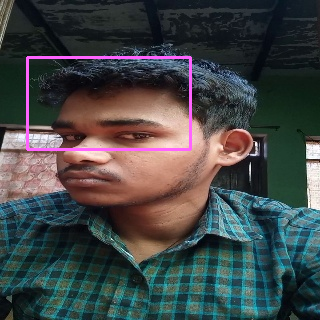

In [ ]:
# from cvzone.FaceDetectionModule import FaceDetector
from google.colab.patches import cv2_imshow
image_name = 'image-6-154'
image_path = f"./datasets/live_video/image/{image_name}.jpg"
annot_path = f"./datasets/live_video/annotation/{image_name}.txt"

class_index, x_center, y_center, w, h = 0, 0, 0, 0, 0
with open(annot_path, "r") as file:
    # Split the line into individual values
    for line in file:
        values = [int(val) for val in line.split()]
        class_index, x_center, y_center, w, h = values
        print(values)

image = cv2.imread(image_path)


# Draw the bounding box on the image
color = (255, 100, 255)
thickness = 2

x = int(2 * x_center - w)
y = int(2 * y_center - h)

cv2.rectangle(resized_image, (x, y), (x + w, y + h), color, thickness)
cv2_imshow(image)

Resize image

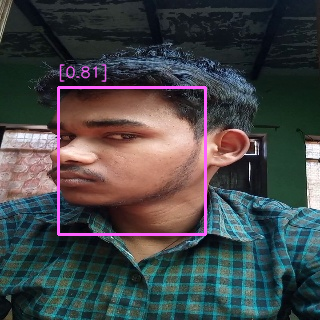

In [ ]:
import cv2

# Read the original image
image = cv2.imread("./datasets/live_video/image/image-6-142.jpg")
original_height, original_width = image.shape[:2]

# Resize the image
resized_image = cv2.resize(image, (320, 320))
resized_height, resized_width = resized_image.shape[:2]

# Detect faces and get bounding boxes
img, boxes = detector.findFaces(image)  # Use the original image for detection

# Calculate scale factors
scale_x = resized_width / original_width
scale_y = resized_height / original_height

# Adjust bounding boxes for the resized image
adjusted_boxes = []
for box in boxes:
    x, y, w, h = box['bbox']
    score = box['score']
    text = f"{[float(format(s,'.2f')) for s in score]}"  # Format to 2 decimal places
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_position = (int(x * scale_x), int(y * scale_y) - 10)

    # Draw the text on the image
    cv2.putText(resized_image, text, text_position, font, 0.5, (255, 100, 255), 1, cv2.LINE_AA)


    adjusted_box = {
        'bbox': [
            int(x * scale_x),
            int(y * scale_y),
            int(w * scale_x),
            int(h * scale_y)
        ]
    }
    adjusted_boxes.append(adjusted_box)

# Draw the adjusted bounding boxes on the resized image
for box in adjusted_boxes:
    x, y, w, h = box['bbox']
    cv2.rectangle(resized_image, (x, y), (x + w, y + h), (255, 100, 255), 2)

# Display the resized image with adjusted bounding boxes
cv2_imshow(resized_image)